In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from classy_sz import Class
from scipy.optimize import fsolve
from scipy.interpolate import interp1d
import math

Metal device set to: Apple M1 Pro


2023-03-25 00:32:54.869948: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-03-25 00:32:54.870078: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


# instructions:

this is run from terminal:

$ ./class class_sz_test_n5k.ini

A file is printed. We plot it against the reference

In [2]:
Pk = np.load('/Users/boris/Work/CLASS-SZ/SO-SZ/N5K/input/pk.npz')

In [3]:
Pk.files

['k', 'z', 'pk_nl', 'pk_lin']

In [4]:
Pk['z']

array([0.        , 0.07142857, 0.14285714, 0.21428571, 0.28571429,
       0.35714286, 0.42857143, 0.5       , 0.57142857, 0.64285714,
       0.71428571, 0.78571429, 0.85714286, 0.92857143, 1.        ,
       1.07142857, 1.14285714, 1.21428571, 1.28571429, 1.35714286,
       1.42857143, 1.5       , 1.57142857, 1.64285714, 1.71428571,
       1.78571429, 1.85714286, 1.92857143, 2.        , 2.07142857,
       2.14285714, 2.21428571, 2.28571429, 2.35714286, 2.42857143,
       2.5       , 2.57142857, 2.64285714, 2.71428571, 2.78571429,
       2.85714286, 2.92857143, 3.        , 3.07142857, 3.14285714,
       3.21428571, 3.28571429, 3.35714286, 3.42857143, 3.5       ])

In [13]:
np.shape(Pk['pk_nl'])

(50, 200)

In [14]:
np.savetxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/n5k_pk_nl.txt',Pk['pk_nl'])

In [15]:
np.savetxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/n5k_k.txt',Pk['k'])

In [16]:
np.savetxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/n5k_z.txt',Pk['z'])

In [8]:
pkz = np.loadtxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/class_sz_auxiliary_files/n5k_pk_nl.txt')
np.shape(pkz)

(50, 200)

In [9]:
pkz_k = np.loadtxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/class_sz_auxiliary_files/n5k_k.txt')
np.shape(pkz_k)


(200,)

In [10]:
pkz_z = np.loadtxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/class_sz_auxiliary_files/n5k_z.txt')
np.shape(pkz_z)

(50,)

In [11]:
Ks = np.load('/Users/boris/Work/CLASS-SZ/SO-SZ/N5K/input/kernels_fullwidth.npz')
Ks.files

['z_cl', 'chi_cl', 'kernels_cl', 'z_sh', 'chi_sh', 'kernels_sh']

In [12]:
np.shape(Ks['kernels_cl'])

(10, 2000)

In [13]:
np.shape(Ks['z_cl'])

(2000,)

In [14]:
np.shape(Ks['kernels_sh'])

(5, 2000)

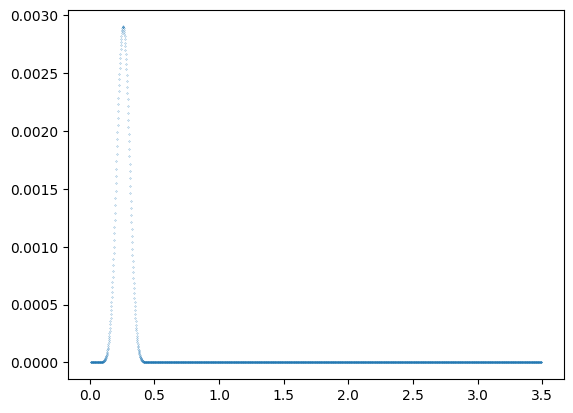

In [41]:
plt.plot(Ks['z_cl'],Ks['kernels_cl'][0],marker='o',ls='None',markersize=0.2)

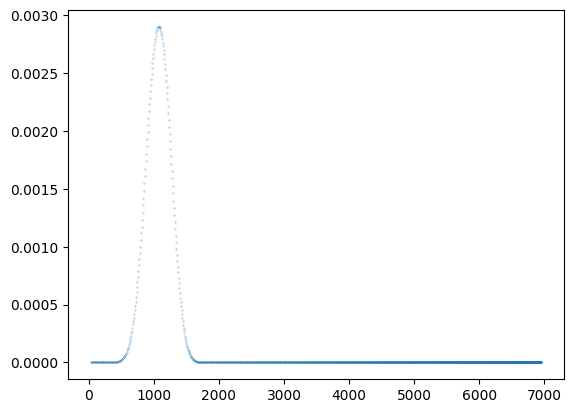

In [15]:
plt.plot(Ks['chi_cl'],Ks['kernels_cl'][0],marker='o',ls='None',markersize=0.2)

In [41]:
for i in range(10):
    np.savetxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/n5k_gg_chi_K%d.txt'%i,np.c_[Ks['chi_cl'],Ks['kernels_cl'][i]])

In [43]:
for i in range(5):
    np.savetxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/n5k_ss_chi_K%d.txt'%i,np.c_[Ks['chi_sh'],Ks['kernels_sh'][i]])

In [16]:
Ks['chi_cl']

array([  25.96064105,   33.71271985,   41.45840015, ..., 6952.86614787,
       6954.30233692, 6955.73771953])

In [26]:
np.savetxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/sz_auxiliary_files/n5k_z_chi.txt',
           np.c_[Ks['z_cl'],Ks['chi_cl']]
          )

In [17]:
np.sum(Ks['chi_cl']-Ks['chi_sh'])

0.0

In [18]:
np.sum(Ks['z_cl']-Ks['z_sh'])

0.0

In [19]:
Ks['z_cl']

array([0.00583333, 0.00757837, 0.00932341, ..., 3.49067592, 3.49242096,
       3.494166  ])

In [20]:
Ks['chi_cl']

array([  25.96064105,   33.71271985,   41.45840015, ..., 6952.86614787,
       6954.30233692, 6955.73771953])

In [21]:
clgg = np.load('/Users/boris/Work/CLASS-SZ/SO-SZ/N5K/tests/benchmarks_nl_clgg.npz')

In [22]:
np.shape(clgg['cls'])

(55, 103)

In [27]:
np.shape(clgg['ls'])

(103,)

/var/folders/h0/4_tf3pcn1h32ks9grh325v400000gn/T/ipykernel_53679/2112643896.py:11: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0,2200)


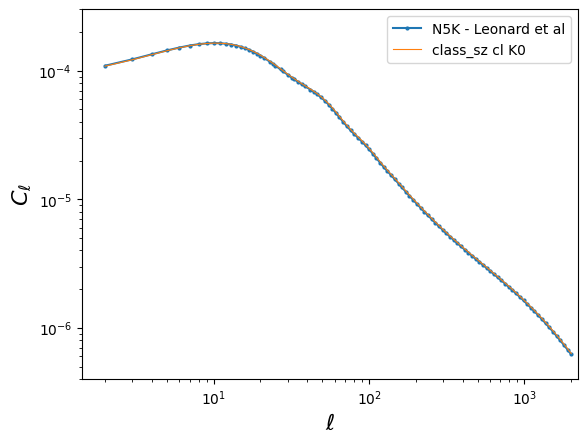

In [82]:
l_csz = clgg['ls']
cls_csz = np.loadtxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/output/class_sz_test_n5k41_n5k_F.txt',unpack=True)

np.shape(cls_csz)

plt.plot(clgg['ls'],clgg['cls'][0],marker='o',markersize=2.,label='N5K - Leonard et al')
plt.plot(l_csz,cls_csz,marker='o',markersize=0.,label='class_sz cl K0',ls='-',lw=0.8)
plt.xscale('log')
plt.yscale('log')
plt.ylim(4e-7,3e-4)
plt.xlim(0,2200)
plt.legend()
plt.xlabel(r'$\ell$',size=16)
plt.ylabel(r'$C_\ell$',size=16)
plt.savefig('n5k.pdf')

In [81]:

err = np.sqrt(2./(2.*clgg['ls']+1.))*clgg['cls'][0]
np.abs((clgg['cls'][0]-cls_csz)/err)

array([1.13849652e-02, 1.25846005e-02, 1.26788371e-02, 1.22957525e-02,
       1.09913831e-02, 9.83551586e-03, 7.89318713e-03, 5.50508108e-03,
       1.78591779e-03, 2.23316624e-04, 4.94151180e-03, 6.98942355e-03,
       1.06321953e-02, 1.54829213e-02, 1.77623304e-02, 2.34255562e-02,
       2.73612616e-02, 3.06304886e-02, 3.64362009e-02, 3.85456778e-02,
       4.63852432e-02, 4.72646574e-02, 5.12297478e-02, 5.32729289e-02,
       5.58164580e-02, 5.61013574e-02, 5.45700295e-02, 5.57414531e-02,
       5.36780273e-02, 5.16761474e-02, 5.20218970e-02, 5.32341199e-02,
       5.74780432e-02, 6.38005818e-02, 7.35399655e-02, 8.62091408e-02,
       1.01805585e-01, 1.18191816e-01, 1.31755838e-01, 1.39061901e-01,
       1.45784781e-01, 1.42587429e-01, 1.42314676e-01, 1.32409094e-01,
       1.28912733e-01, 1.32906437e-01, 1.44150011e-01, 1.59877595e-01,
       1.76100600e-01, 1.85696020e-01, 1.94191689e-01, 1.86925055e-01,
       1.76712290e-01, 1.69954365e-01, 1.76643496e-01, 1.81029676e-01,
      

In [64]:
len(clgg['ls'])

103